https://www.kaggle.com/vtechcoder/clustering-and-paper-search-textmining-for-covid19

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#!pip install wordcloud
#!pip install fastai

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from fastai import *
from fastai.text import *
#IPython.display.Image._ACCEPTABLE_EMBEDDINGS

In [4]:
def gen_freq(text):
    word_list=[]
    #loop over all thetext
    for tw_words in text.split():
        word_list.extend(tw_words)
    #creating frequency using word list
    word_freq=pd.Series(word_list).value_counts()
    #print top 25 Words
    word_freq[:25]
    
    return word_freq

In [5]:
df=pd.read_csv("/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/corona.csv").dropna()
df.head(3)

,cord_uid,sha,pmcid,title,abstract,publish_time,url,paper_id,text_body,count_abstract,count_text
0,mjkzf2ka,549ecd5271e2f5d8e14450001ff82f7c6a0f084d; 98ce...,PMC7020022,Population and VariantBased Genome Analyses of...,Rabies in wildlife has been successfully contr...,2020-01-17,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,PMC7020022,vaccination programs are one of the most effec...,186,2741
2,n8vvqb20,3d8c32ca85f775492b317e5afc664200019e0cc4; d076...,PMC7118348,Estimating the infection and case fatality rat...,Adjusting for delay from confirmation to death...,2020-03-26,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,PMC7118348,on 1 february 2020 a patient tested positive f...,71,1465
3,ghfrwccu,4b983de85478a07cfe894da64057fbd13c1826c2; 645b...,PMC7069465,Transplantation of ACE2 Mesenchymal Stem Cells...,A coronavirus HCoV19 has caused the novel coro...,2020-03-09,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,PMC7069465,a pilot trial of intravenous msc transplantati...,264,2037


In [6]:
df.columns

Index(['cord_uid', 'sha', 'pmcid', 'title', 'abstract', 'publish_time', 'url',
       'paper_id', 'text_body', 'count_abstract', 'count_text'],
      dtype='object')

In [7]:
df=df.drop(['cord_uid', 'sha', 'pmcid', 'title', 'abstract', 'publish_time', 'url', 'count_abstract', 'count_text'], axis=1)
df.head()

,paper_id,text_body
0,PMC7020022,vaccination programs are one of the most effec...
2,PMC7118348,on 1 february 2020 a patient tested positive f...
3,PMC7069465,a pilot trial of intravenous msc transplantati...
7,PMC7107203,in december 2019 several patients with pneumon...
8,PMC7107051,the newly discovered novel coronavirus 2019nco...


In [8]:
df.isnull().sum()

paper_id     0
text_body    0
dtype: int64

In [9]:
from nltk.tokenize import word_tokenize
def identify_tokens(row):
    #text = row['body_text']
    tokens = word_tokenize(row)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

df['text_body'] = df['text_body'].apply(identify_tokens)

In [10]:
df.head()

,paper_id,text_body
0,PMC7020022,"[vaccination, programs, are, one, of, the, mos..."
2,PMC7118348,"[on, february, a, patient, tested, positive, f..."
3,PMC7069465,"[a, pilot, trial, of, intravenous, msc, transp..."
7,PMC7107203,"[in, december, several, patients, with, pneumo..."
8,PMC7107051,"[the, newly, discovered, novel, coronavirus, w..."


In [11]:
#removing the stop words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stops =  set(stopwords.words('english')+['com'])

In [12]:
from tqdm import tqdm
#converting all text_body in o=lower case for our eas
def lower_case(input_str):
    if type(input_str)=='float':
        return input_str
    else:
        wordslist=[]
        for word in input_str:
            worD = word.lower()
            wordslist.append(worD)
        return wordslist
df['text_body'] = df['text_body'].apply(lambda x: lower_case(x))

In [13]:
df.head(3)

,paper_id,text_body
0,PMC7020022,"[vaccination, programs, are, one, of, the, mos..."
2,PMC7118348,"[on, february, a, patient, tested, positive, f..."
3,PMC7069465,"[a, pilot, trial, of, intravenous, msc, transp..."


In [14]:
"for" in stopwords.words("english")

True

In [15]:
def clean_words(w):
    if w not in stopwords.words("english"):
        return w
    else:
        pass

In [16]:
words= df['text_body'].apply(lambda word:[item for item in word if item not in stopwords.words("english")])

In [17]:
word_list=[]
    #loop over all thetext
for tw_words in words:
        word_list.extend(tw_words)
word_freq=pd.Series(word_list).value_counts()
    #print top 25 Words
ww=word_freq[:25]

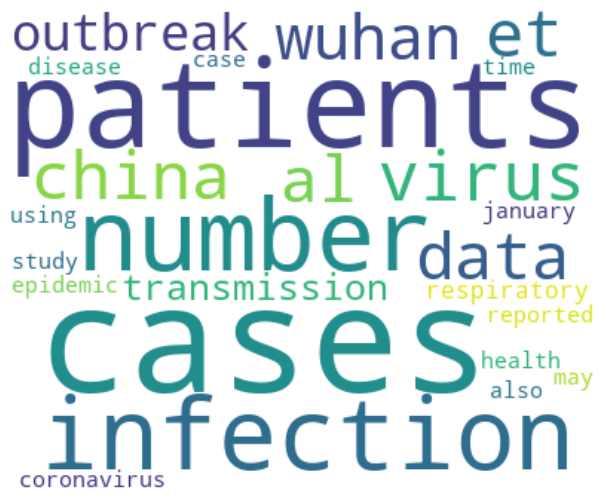

In [18]:
#generate word cloud
wc=WordCloud(width=400,height=330,background_color="white").generate_from_frequencies(ww)
plt.figure(figsize=(13,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
import gensim
# following 4 cells from https://www.kaggle.com/luisblanche/cord-19-use-doc2vec-to-match-articles-to-tasks notebook by Luis
def read_corpus(df, column, tokens_only=False):
    """
    Arguments
    ---------
        df: pd.DataFrame
        column: str 
            text column name
        tokens_only: bool
            wether to add tags or not
    """
    for i, line in enumerate(df[column]):

        tokens = gensim.parsing.preprocess_string(line)
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [20]:
complete_df=pd.read_csv("/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/corona.csv")
complete_df.head(2)

,cord_uid,sha,pmcid,title,abstract,publish_time,url,paper_id,text_body,count_abstract,count_text
0,mjkzf2ka,549ecd5271e2f5d8e14450001ff82f7c6a0f084d; 98ce...,PMC7020022,Population and VariantBased Genome Analyses of...,Rabies in wildlife has been successfully contr...,2020-01-17,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,PMC7020022,vaccination programs are one of the most effec...,186,2741
1,u473zap9,NaN,PMC7096178,Publishing in the time of COVID19,eLife is making changes to its policies on pee...,2020-03-25,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,PMC7096178,elife has always taken a strong stand against ...,21,946


In [21]:
import random
frac_of_articles = .10
train_df  = complete_df.sample(frac=frac_of_articles, random_state=1)
train_corpus = (list(read_corpus(train_df, 'text_body')))

In [22]:
# using distributed memory model
model = gensim.models.doc2vec.Doc2Vec(dm=1, vector_size=60, min_count=5, epochs=20, seed=42, workers=6)
model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [23]:
task1="""What do we know about virus genetics, origin, and evolution? What do we know about the virus origin and management measures at the human-animal interface? Specifically, we want to know what the literature reports about: Real-time tracking of whole genomes and a mechanism for coordinating the rapid dissemination of that information to inform the development of diagnostics and therapeutics and to track variations of the virus over time. Access to geographic and temporal diverse sample sets to understand geographic distribution and genomic differences, and determine whether there is more than one strain in circulation. Multi-lateral agreements such as the Nagoya Protocol could be leveraged. Evidence that livestock could be infected (e.g., field surveillance, genetic sequencing, receptor binding) and serve as a reservoir after the epidemic appears to be over. Evidence of whether farmers are infected, and whether farmers could have played a role in the origin. Surveillance of mixed wildlife- livestock farms for SARS-CoV-2 and other coronaviruses in Southeast Asia. Experimental infections to test host range for this pathogen. Animal host(s) and any evidence of continued spill-over to humans Socioeconomic and behavioral risk factors for this spill-over Sustainable risk reduction strategies"""

In [24]:
from itertools import chain
from nltk.corpus import wordnet
def findsyns(word):
    synonyms = wordnet.synsets(word)
    lemmas = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
    return lemmas
task1a=[item for item in task1.split() if findsyns(item)]

In [25]:
import re
taska1a=re.sub(r"[^a-zA-Z0-9]"," ",str(task1a))
taska1a

'  do    know    about    virus    do    know    about    virus    origin    management    measures    at    want    know    literature    reports    Real time    tracking    whole    genomes    a    mechanism    coordinating    rapid    dissemination    information    inform    development    diagnostics    therapeutics    track    variations    virus    over    Access    geographic    temporal    diverse    sample    sets    understand    geographic    distribution    determine    there    is    more    one    strain    in    agreements    such    as    Nagoya    Protocol    be    Evidence    livestock    be    infected    field    genetic    receptor    serve    as    a    reservoir    after    epidemic    appears    be    Evidence    farmers    are    farmers    have    played    a    role    in    Surveillance    mixed    livestock    farms    other    in    Southeast    Experimental    infections    test    host    range    Animal    any    evidence    continued    humans    Soci

In [26]:
list_of_tasks=list()
list_of_tasks=[task1,str(taska1a)]

In [27]:
list_of_tasks

['What do we know about virus genetics, origin, and evolution? What do we know about the virus origin and management measures at the human-animal interface? Specifically, we want to know what the literature reports about: Real-time tracking of whole genomes and a mechanism for coordinating the rapid dissemination of that information to inform the development of diagnostics and therapeutics and to track variations of the virus over time. Access to geographic and temporal diverse sample sets to understand geographic distribution and genomic differences, and determine whether there is more than one strain in circulation. Multi-lateral agreements such as the Nagoya Protocol could be leveraged. Evidence that livestock could be infected (e.g., field surveillance, genetic sequencing, receptor binding) and serve as a reservoir after the epidemic appears to be over. Evidence of whether farmers are infected, and whether farmers could have played a role in the origin. Surveillance of mixed wildli

In [28]:
def get_doc_vector(doc):
    tokens = gensim.parsing.preprocess_string(doc)
    vector = model.infer_vector(tokens)
    return vector
body_text_vectors = model.docvecs.vectors_docs
array_of_tasks = [get_doc_vector(task) for task in list_of_tasks]
train_df['body_text_vectors'] = [vec for vec in body_text_vectors]

# Nearest Neigbors search

In [29]:
train_df = train_df[train_df['text_body'].apply(lambda x: len(re.findall(r"(?i)\b[a-z]+\b", x))) > 30]
train_df.shape

(154, 12)

In [30]:
#KNN search fitted for body_text vec
train_array = train_df['body_text_vectors'].values.tolist()
train_array[:3]

[array([ 1.895722,  1.21764 , -1.100549,  1.547643, ..., -2.637234, -0.376819, -0.835847, -0.01743 ], dtype=float32),
 array([-2.229133,  0.311309,  0.501134, -0.069368, ...,  0.477449,  0.903847,  0.235133, -0.638635], dtype=float32),
 array([ 0.147008,  0.962404, -0.95774 ,  1.760943, ..., -1.684862,  1.03141 , -0.679072,  2.848409], dtype=float32)]

In [31]:
from sklearn.neighbors import NearestNeighbors
ball_tree = NearestNeighbors(algorithm='ball_tree', leaf_size=20).fit(train_array)
distances, indices = ball_tree.kneighbors(array_of_tasks, n_neighbors=3)

In [32]:
for i, info in enumerate(list_of_tasks):
    print("="*80, f"\n\nTask = {info[:100]}\n", )
    df =  train_df.iloc[indices[i]]
    body_text = df['text_body']
    titles = df['title']
    dist = distances[i]
    for l in range(len(dist)):
        print(f" Text index = {indices[i][l]} \n Distance to bullet = {distances[i][l]} \n Title: {titles.iloc[l]} \n Abstract Extract: {body_text.iloc[l][:200]}\n\n")


Task = What do we know about virus genetics, origin, and evolution? What do we know about the virus origin 

 Text index = 33 
 Distance to bullet = 4.250237309840028 
 Title: Baricitinib as potential treatment for 2019nCoV acute respiratory disease 
 Abstract Extract: given the scale and rapid spread of the 2019 novel coronavirus 2019ncov acute respiratory disease there is an immediate need for medicines that can help before a vaccine can be produced results of rap


 Text index = 114 
 Distance to bullet = 4.791735676176263 
 Title: COVID19 in a patient with longterm use of glucocorticoids A study of a familial cluster 
 Abstract Extract: in december 2019 a novel pneumonia resulting from sarscov2 named coronavirus disease 2019 covid19 emerged in wuhan due to the high viral contagiousness and transmission during the presymptomatic phase


 Text index = 10 
 Distance to bullet = 5.046160990187607 
 Title: EARLY ESTIMATION OF REPRODUCTION NUMBER OF COVID19 IN VIETNAM 
 Abstract Extract

# Covid Paper Browser

In [33]:
#!pip install transformers
#!pip install sentence-transformers
#!pip download prettytable
#!pip install PrettyTable

In [37]:
#!pip install https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2

In [38]:
%%time
import os
import tqdm
import textwrap
import json
import prettytable
import logging
import pickle
import warnings
warnings.simplefilter('ignore')

from  transformers import *
import pandas as pd
import scipy
from sentence_transformers import SentenceTransformer

COVID_BROWSER_ASCII = """
================================================================================
  _____           _     _      __  ___    ____                                  
 / ____|         (_)   | |    /_ |/ _ \  |  _ \                                 
| |     _____   ___  __| | ___ | | (_) | | |_) |_ __ _____      _____  ___ _ __ 
| |    / _ \ \ / / |/ _` ||___|| |\__, | |  _ <| '__/ _ \ \ /\ / / __|/ _ \ '__|
| |___| (_) \ V /| | (_| |     | |  / /  | |_) | | | (_) \ V  V /\__ \  __/ |   
 \_____\___/ \_/ |_|\__,_|     |_| /_/   |____/|_|  \___/ \_/\_/ |___/\___|_|   
=================================================================================
"""

COVID_BROWSER_INTRO = """
This demo uses a state-of-the-art language model trained on scientific papers to
search passages matching user-defined queries inside the COVID-19 Open Research
Dataset. Ask something like 'Is smoking a risk factor for Covid-19?' to retrieve
relevant abstracts.\n
"""

BIORXIV_PATH = '/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/biorxiv_medrxiv/biorxiv_medrxiv/'
COMM_USE_PATH = '/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/comm_use_subset/comm_use_subset/'
NONCOMM_USE_PATH = '/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/noncomm_use_subset/noncomm_use_subset/'
METADATA_PATH = '/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/metadata.csv'

DATA_PATH = '/Users/patsnap/Desktop/Neo4J_and_other_codes/Coronavirus_19/CORD-19-research-challenge/'
MODELS_PATH = 'models'
MODEL_NAME = 'scibert-nli'
CORPUS_PATH = os.path.join(DATA_PATH, 'corpus.pkl')
MODEL_PATH = os.path.join(MODELS_PATH, MODEL_NAME)
EMBEDDINGS_PATH = os.path.join(DATA_PATH, f'{MODEL_NAME}-embeddings.pkl')


def load_json_files(dirname):
    filenames = [file for file in os.listdir(dirname) if file.endswith('.json')]
    raw_files = []

    for filename in tqdm(filenames):
        filename = dirname + filename
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)
    print('Loaded', len(raw_files), 'files from', dirname)
    return raw_files


def create_corpus_from_json(files):
    corpus = []
    for file in tqdm(files):
        for item in file['abstract']:
            corpus.append(item['text'])
        for item in file['body_text']:
            corpus.append(item['text'])
    print('Corpus size', len(corpus))
    return corpus


def cache_corpus(mode='CSV'):
    corpus = []
    if mode == 'CSV':
        df = pd.read_csv(METADATA_PATH)
        corpus = [a for a in df['abstract'] if type(a) == str and a != "Unknown"]
        print('Corpus size', len(corpus))
    elif mode == 'JSON':
        biorxiv_files = load_json_files(BIORXIV_PATH)
        comm_use_files = load_json_files(COMM_USE_PATH)
        noncomm_use_files = load_json_files(NONCOMM_USE_PATH)
        corpus = create_corpus_from_json(biorxiv_files + comm_use_files + noncomm_use_files)
    else:
        raise AttributeError('Mode should be either CSV or JSON')
    '''with open(CORPUS_PATH, 'wb') as file:
        pickle.dump(corpus, file)'''
    return corpus


def ask_question(query, model, corpus, corpus_embed, top_k=5):
    """
    Adapted from https://www.kaggle.com/dattaraj/risks-of-covid-19-ai-driven-q-a
    """
    queries = [query]
    query_embeds = model.encode(queries, show_progress_bar=False)
    for query, query_embed in zip(queries, query_embeds):
        distances = scipy.spatial.distance.cdist([query_embed], corpus_embed, "cosine")[0]
        distances = zip(range(len(distances)), distances)
        distances = sorted(distances, key=lambda x: x[1])
        results = []
        for count, (idx, distance) in enumerate(distances[0:top_k]):
            results.append([count + 1, corpus[idx].strip(), round(1 - distance, 4)])
    return results


def show_answers(results):
    table = prettytable.PrettyTable(['Rank', 'Abstract', 'Score'])
    for res in results:
        rank = res[0]
        text = res[1]
        text = textwrap.fill(text, width=75)
        text = text + '\n\n'
        score = res[2]
        table.add_row([
            rank,
            text,
            score
        ])
    print('\n')
    print(str(table))
    print('\n')

if __name__ == '__main__':
    os.system('cls' if os.name == 'nt' else 'clear')
    print(COVID_BROWSER_ASCII)
    print(COVID_BROWSER_INTRO)
    if not os.path.exists(CORPUS_PATH):
        print("Caching the corpus for future use...")
        corpus = cache_corpus()
    else:
        print("Loading the corpus from", CORPUS_PATH, '...')
        with open(CORPUS_PATH, 'rb') as corpus_pt:
            corpus = pickle.load(corpus_pt)

    model =  SentenceTransformer('bert-base-nli-stsb-mean-tokens')

    if not os.path.exists(EMBEDDINGS_PATH):
        print("Computing and caching model embeddings for future use...")
        embeddings = model.encode(corpus, show_progress_bar=True)
        '''with open(EMBEDDINGS_PATH, 'wb') as file:
            pickle.dump(embeddings, file)'''
    else:
        print("Loading model embeddings from", EMBEDDINGS_PATH, '...')
        with open(EMBEDDINGS_PATH, 'rb') as file:
            embeddings = pickle.load(file)


  _____           _     _      __  ___    ____                                  
 / ____|         (_)   | |    /_ |/ _ \  |  _ \                                 
| |     _____   ___  __| | ___ | | (_) | | |_) |_ __ _____      _____  ___ _ __ 
| |    / _ \ \ / / |/ _` ||___|| |\__, | |  _ <| '__/ _ \ \ /\ / / __|/ _ \ '__|
| |___| (_) \ V /| | (_| |     | |  / /  | |_) | | | (_) \ V  V /\__ \  __/ |   
 \_____\___/ \_/ |_|\__,_|     |_| /_/   |____/|_|  \___/ \_/\_/ |___/\___|_|   


This demo uses a state-of-the-art language model trained on scientific papers to
search passages matching user-defined queries inside the COVID-19 Open Research
Dataset. Ask something like 'Is smoking a risk factor for Covid-19?' to retrieve
relevant abstracts.


Caching the corpus for future use...
Corpus size 42015


100%|██████████| 405M/405M [00:49<00:00, 8.27MB/s] 
Batches:   0%|          | 1/5252 [00:00<16:49,  5.20it/s]

Computing and caching model embeddings for future use...


Batches: 100%|██████████| 5252/5252 [3:18:08<00:00,  2.62s/it]  

CPU times: user 7h 26min, sys: 15min 54s, total: 7h 41min 54s
Wall time: 3h 19min 11s


In [40]:
#list(findsynonyms('car'))
#words=df['body_text'].apply(lambda word:[item for item in word if item not in stopwords.words("english")])
task1a=[item for item in task1.split() if findsyns(item)]
#converting token back to string
import re
taska1a=re.sub(r"[^a-zA-Z0-9]"," ",str(task1a))

In [41]:
list_of_tasks=list()
list_of_tasks=[task1,str(taska1a)]

In [42]:
for i in range(len(list_of_tasks)):
    query = list_of_tasks[i]
    print(f'Query {i+1} : {query}\n\n')
    results = ask_question(query, model, corpus, embeddings)
    show_answers(results)

Query 1 : What do we know about virus genetics, origin, and evolution? What do we know about the virus origin and management measures at the human-animal interface? Specifically, we want to know what the literature reports about: Real-time tracking of whole genomes and a mechanism for coordinating the rapid dissemination of that information to inform the development of diagnostics and therapeutics and to track variations of the virus over time. Access to geographic and temporal diverse sample sets to understand geographic distribution and genomic differences, and determine whether there is more than one strain in circulation. Multi-lateral agreements such as the Nagoya Protocol could be leveraged. Evidence that livestock could be infected (e.g., field surveillance, genetic sequencing, receptor binding) and serve as a reservoir after the epidemic appears to be over. Evidence of whether farmers are infected, and whether farmers could have played a role in the origin. Surveillance of mixe



+------+-----------------------------------------------------------------------------+--------+
| Rank |                                   Abstract                                  | Score  |
+------+-----------------------------------------------------------------------------+--------+
|  1   |    The spread of pathogens in swine populations is in part determined by    | 0.8167 |
|      |    movements of animals between farms. However, understanding additional    |        |
|      |   characteristics that predict disease outbreaks and uncovering landscape   |        |
|      |     factors related to between-farm spread are crucial steps toward risk    |        |
|      |  mitigation. This study integrates animal movements with environmental risk |        |
|      |    factors to identify the occurrence of porcine epidemic diarrhea virus    |        |
|      |    (PEDV) outbreaks. Using weekly farm-level incidence data from 332 sow    |        |
|      |    farms, we applied machine-